In [1]:
import geopandas as gpd
gpd.__version__

'0.14.0'

### 2.3.1 新增concave_hull()方法

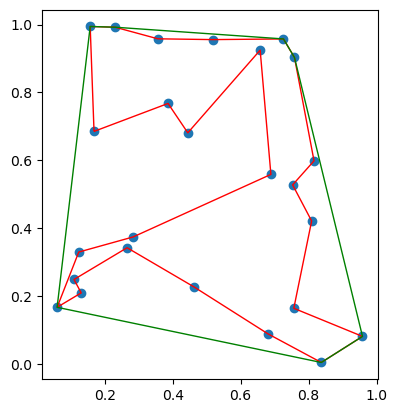

In [2]:
import random
from shapely.geometry import MultiPoint

# 示例GeoSeries
demo_geometries = gpd.GeoSeries(
    [
        MultiPoint([(random.uniform(0, 1), random.uniform(0, 1)) for i in range(25)])
    ]
)

ax = demo_geometries.plot()
# concave_hull()计算结果
demo_geometries.concave_hull().plot(ax=ax, facecolor='none', edgecolor='red')
# 对比convex_hull()计算结果
demo_geometries.convex_hull.plot(ax=ax, facecolor='none', edgecolor='green');

### 2.3.2 新增delaunay_triangles()方法

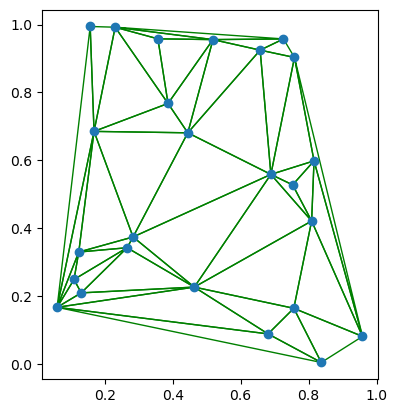

In [3]:
ax = demo_geometries.delaunay_triangles().plot(edgecolor='green', facecolor='none')
demo_geometries.plot(ax=ax);

### 2.3.3 新增extract_unique_points()方法

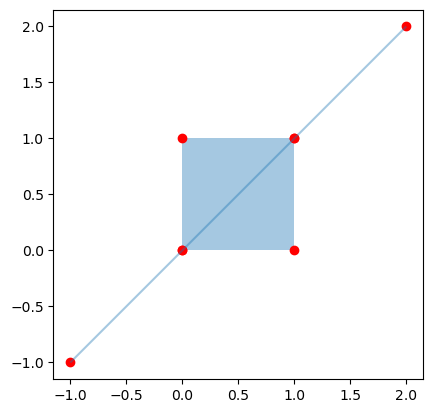

In [4]:
from shapely.geometry import LineString, Polygon

demo_geometries = (
    gpd
    .GeoSeries(
        [
            # 示例线要素
            LineString([(i, i) for i in range(-1, 3)]),
            # 示例面要素
            Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
        ]
    )
)
ax = demo_geometries.plot(alpha=0.4)
# 点要素抽取结果
demo_geometries.extract_unique_points().plot(ax=ax, color='red');

### 2.3.4 新增frechet_distance()方法

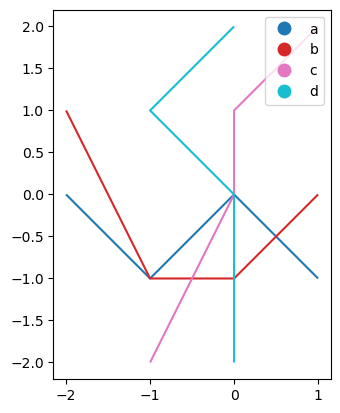

In [5]:
# 构造示例路径
demo_paths = gpd.GeoDataFrame(
    {
        'id': list('abcd'),
        'geometry': [
            LineString([(-2, 0), (-1, -1), (0, 0), (1, -1)]),
            LineString([(-2, 1), (-1, -1), (0, -1), (1, 0)]),
            LineString([(-1, -2), (0, 0), (0, 1), (1, 2)]),
            LineString([(0, -2), (0, 0), (-1, 1), (0, 2)]),
        ]
    }
)
demo_paths.plot(column='id', legend=True);

In [6]:
(
    demo_paths
    .merge(
        demo_paths,
        how='cross'
    )
    .query('id_x != id_y')
    .assign(
        frechet_distance=lambda df: (
            gpd.GeoSeries(df.geometry_x)
            .frechet_distance(gpd.GeoSeries(df.geometry_y))
        )
    )
    .groupby('id_x', group_keys=False)
    .apply(lambda df: df.sort_values('frechet_distance').head(1))
)

,id_x,geometry_x,id_y,geometry_y,frechet_distance
1,a,"LINESTRING (-2.00000 0.00000, -1.00000 -1.0000...",b,"LINESTRING (-2.00000 1.00000, -1.00000 -1.0000...",1.0
4,b,"LINESTRING (-2.00000 1.00000, -1.00000 -1.0000...",a,"LINESTRING (-2.00000 0.00000, -1.00000 -1.0000...",1.0
11,c,"LINESTRING (-1.00000 -2.00000, 0.00000 0.00000...",d,"LINESTRING (0.00000 -2.00000, 0.00000 0.00000,...",1.0
14,d,"LINESTRING (0.00000 -2.00000, 0.00000 0.00000,...",c,"LINESTRING (-1.00000 -2.00000, 0.00000 0.00000...",1.0


### 2.3.5 新增minimum_rotated_rectangle()方法

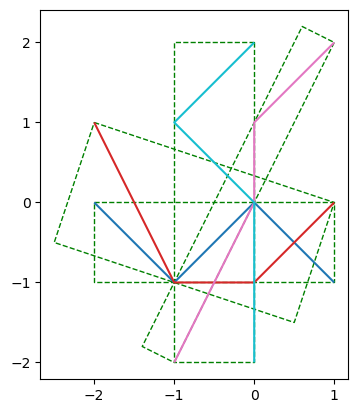

In [7]:
ax = demo_paths.plot(column='id')
demo_paths.minimum_rotated_rectangle().plot(ax=ax, facecolor='none', edgecolor='green', linestyle='--');

### 2.3.6 新增offset_curve()方法

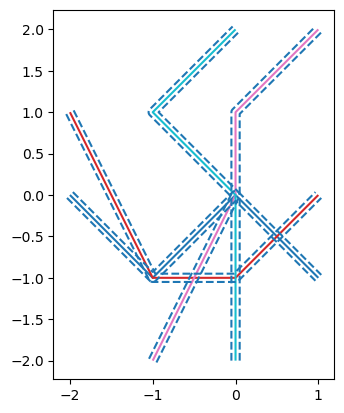

In [8]:
ax = demo_paths.plot(column='id')
demo_paths.offset_curve(0.05).plot(ax=ax, linestyle='--')
demo_paths.offset_curve(-0.05).plot(ax=ax, linestyle='--');

### 2.3.7 新增remove_repeated_points()方法

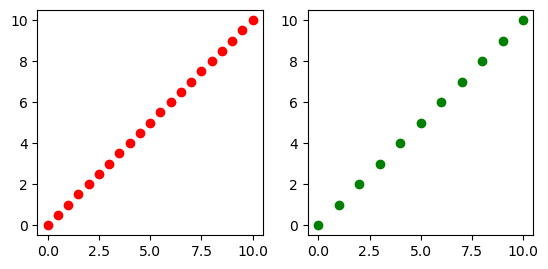

In [9]:
import numpy as np
import matplotlib.pyplot as plt

demo_lines = gpd.GeoSeries(
    [
        LineString([(i, i) for i in np.linspace(0, 10, 21)])
    ]
)

fig, ax = plt.subplots(nrows=1, ncols=2)
demo_lines.extract_unique_points().plot(color='red', ax=ax[0]);
# 移除距离在阈值之内的重复点
demo_lines.remove_repeated_points(1).extract_unique_points().plot(color='green', ax=ax[1]);

### 2.3.8 新增segmentize()方法

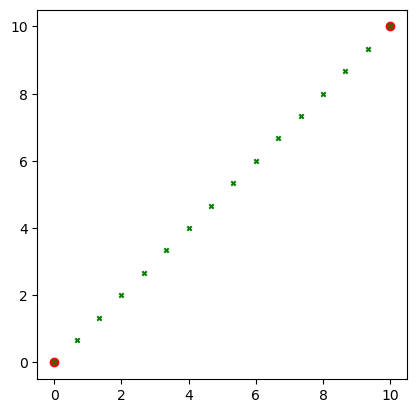

In [10]:
demo_lines = gpd.GeoSeries([LineString([(0, 0), (10, 10)])])

ax = demo_lines.extract_unique_points().plot(color='red')
demo_lines.segmentize(1).extract_unique_points().plot(ax=ax, color='green', markersize=10, marker='x');

### 2.3.9 新增shortest_line()方法

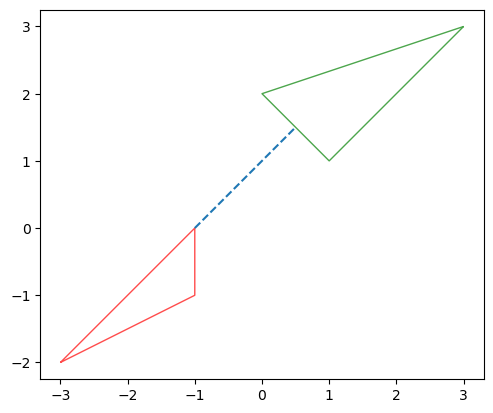

In [11]:
demo_polygon1 = gpd.GeoSeries([Polygon([(-3, -2), (-1, -1), (-1, 0)])])
demo_polygon2 = gpd.GeoSeries([Polygon([(3, 3), (1, 1), (0, 2)])])

ax = demo_polygon1.plot(facecolor='none', edgecolor='red', alpha=0.7)
demo_polygon2.plot(ax=ax, facecolor='none', edgecolor='green', alpha=0.7)
demo_polygon1.shortest_line(demo_polygon2).plot(ax=ax, linestyle='--');

## 2.4 sjoin_nearest()新增exclusive参数

In [12]:
from shapely.geometry import Point

demo_gdf = gpd.GeoDataFrame(
    {
        'id': range(2),
        'geometry': [Point(0, 0), Point(1, 0)]
    }
)
demo_gdf

,id,geometry
0,0,POINT (0.00000 0.00000)
1,1,POINT (1.00000 0.00000)


In [13]:
gpd.sjoin_nearest(demo_gdf, demo_gdf)

,id_left,geometry,index_right,id_right
0,0,POINT (0.00000 0.00000),0,0
1,1,POINT (1.00000 0.00000),1,1


In [14]:
gpd.sjoin_nearest(demo_gdf, demo_gdf, exclusive=True)

,id_left,geometry,index_right,id_right
0,0,POINT (0.00000 0.00000),1,1
1,1,POINT (1.00000 0.00000),0,0
